In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [136]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [137]:
# 1. Make the following changes to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings = killings.rename(columns = {'raceethnicity': 'race', 'lawenforcementagency': 'agency'})
killings

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


In [138]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [141]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna(value = "Unknown")
killings.isnull().sum()
killings['streetaddress'].value_counts().head()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [142]:
# 4. How many killings were there so far in 2015?
killings['year'].value_counts()

2015    467
Name: year, dtype: int64

In [143]:
# 5. Of all killings, how many were male and how many female?
killings['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [144]:
# 6. How many killings were of unarmed people?
from collections import Counter
Counter(killings['armed'])['No']

102

In [145]:
# 7. What percentage of all killings were unarmed?
"{0:.0f}%".format(Counter(killings['armed'])['No']/float(len(killings)) * 100)

'22%'

In [146]:
# 8. What are the 5 states with the most killings?
killings['state'].value_counts()[0:5]

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [147]:
# 9. Show a value counts of deaths for each race
killings['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

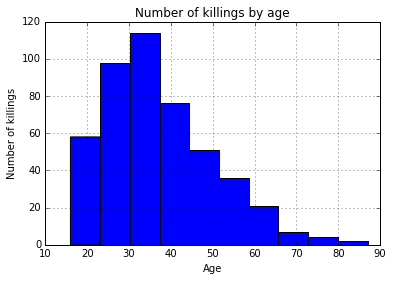

In [148]:
# 10. Display a histogram of ages of all killings
killings.hist('age')
plt.title("Number of killings by age")
plt.xlabel("Age")
plt.ylabel("Number of killings")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001395A630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000112DCF98>]], dtype=object)

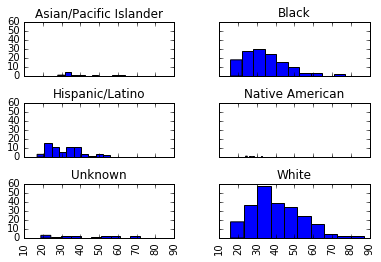

In [149]:
# 11. Show 6 histograms of ages by race
killings.hist('age', by = 'race', sharex = True, sharey = True)

In [150]:
# 12. What is the average age of death by race?
killings.groupby('race').mean()['age']

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

Counter({'April': 96,
         'February': 84,
         'January': 90,
         'June': 2,
         'March': 114,
         'May': 81})

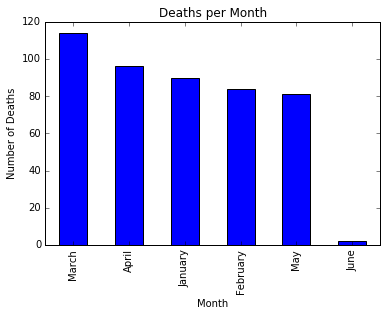

In [151]:
# 13. Show a bar chart with counts of deaths every month
killings['month'].value_counts().plot(kind='bar')
plt.title("Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
Counter(killings['month'])

In [152]:
###################
### Less Morbid ###
###################

In [153]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [154]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.pop('Employed_full_time_year_round')
majors.pop('Major_code')
majors

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000


In [40]:
# 2. Show the count of missing values in each column
majors.isnull().count()

Unnamed: 0           173
Major                173
Major_category       173
Total                173
Employed             173
Unemployed           173
Unemployment_rate    173
Median               173
P25th                173
P75th                173
dtype: int64

In [155]:
# 3. What are the top 10 highest paying majors?
top10 = majors.sort('Median', ascending=0).head(10)
majors.sort('Median', ascending=0).head(10)['Major']

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


59                                 PETROLEUM ENGINEERING
154    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
57             NAVAL ARCHITECTURE AND MARINE ENGINEERING
55                             METALLURGICAL ENGINEERING
58                                   NUCLEAR ENGINEERING
56                        MINING AND MINERAL ENGINEERING
97                      MATHEMATICS AND COMPUTER SCIENCE
48                                ELECTRICAL ENGINEERING
45                                  CHEMICAL ENGINEERING
51                GEOLOGICAL AND GEOPHYSICAL ENGINEERING
Name: Major, dtype: object

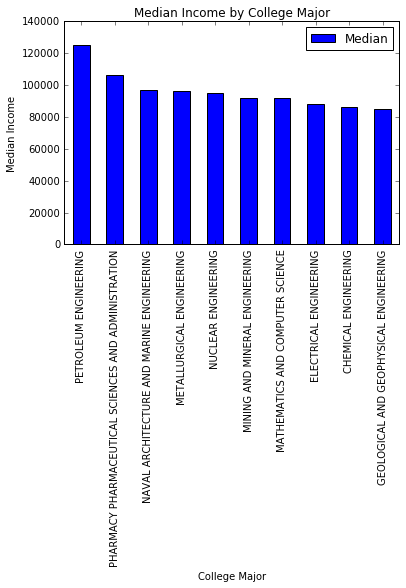

In [156]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
top10.plot(x='Major', y='Median', rot=90, kind="bar")
plt.xlabel("College Major")
plt.ylabel("Median Income")
plt.title("Median Income by College Major")

In [157]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').mean()['Median'].round(decimals=0)

Major_category
Agriculture & Natural Resources        55000
Arts                                   43525
Biology & Life Science                 50821
Business                               60615
Communications & Journalism            49500
Computers & Mathematics                66273
Education                              43831
Engineering                            77759
Health                                 56458
Humanities & Liberal Arts              46080
Industrial Arts & Consumer Services    52643
Interdisciplinary                      43000
Law & Public Policy                    52800
Physical Sciences                      62400
Psychology & Social Work               44556
Social Science                         53222
Name: Median, dtype: float64

In [158]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').mean()['Median'].round(decimals=0).sort_values(ascending = False).index[0:5]

Index([u'Engineering', u'Computers & Mathematics', u'Physical Sciences',
       u'Business', u'Health'],
      dtype='object', name=u'Major_category')

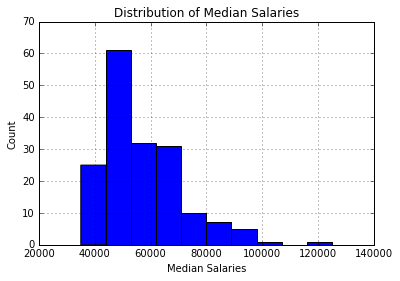

In [159]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()
plt.xlabel("Median Salaries")
plt.ylabel("Count")
plt.title("Distribution of Median Salaries")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016D3A908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A99A358>]], dtype=object)

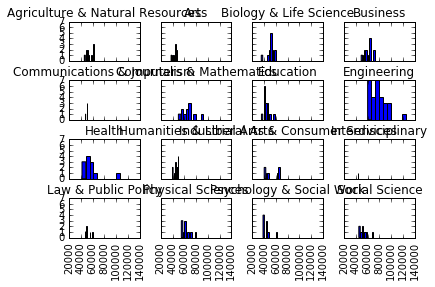

In [160]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.hist('Median', by='Major_category', sharex=True, sharey=True)

In [161]:
# 9. What are the top 10 most UNemployed majors?
majors.sort('Unemployment_rate', ascending=False)['Major'][0:10]

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


146                     MISCELLANEOUS FINE ARTS
116                         CLINICAL PSYCHOLOGY
93                        MILITARY TECHNOLOGIES
27                    SCHOOL STUDENT COUNSELING
77                              LIBRARY SCIENCE
141                  VISUAL AND PERFORMING ARTS
19     COMPUTER PROGRAMMING AND DATA PROCESSING
119                           SOCIAL PSYCHOLOGY
104                  ASTRONOMY AND ASTROPHYSICS
11                                 ARCHITECTURE
Name: Major, dtype: object

In [162]:
# What are the unemployment rates?
High_unemployed = majors.sort('Unemployment_rate', ascending=False)
Rates = High_unemployed[['Major', 'Unemployment_rate']][0:10]
Rates

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [163]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
majors.groupby('Major_category').mean()['Unemployment_rate'].sort_values(ascending = False).index[0:10]
# What are the unemployment rates?
majors.groupby('Major_category').mean()['Unemployment_rate'].sort_values(ascending = False)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Business                               0.054496
Engineering                            0.050630
Biology & Life Science                 0.049936
Health                                 0.047209
Education                              0.046762
Agriculture & Natural Resources        0.039569
Name: Unemployment_rate, dtype: float64

In [164]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the employment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors['Employed'] /  majors['Total']
majors

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000,0.793902
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000,0.747950
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000,0.747690
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000,0.825608
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000,0.694458


In [166]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
newarray = np.ones(len(majors))
newarray

dataframe_ones = pd.DataFrame(newarray, columns=['ones'])
dataframe_ones

majors['sample_unemployment_rate'] = dataframe_ones['ones'] - majors['sample_employment_rate']
majors

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738,0.288262
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000,0.793902,0.206098
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000,0.747950,0.252050
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000,0.747690,0.252310
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000,0.825608,0.174392
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000,0.694458,0.305542


In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [108]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
len(businesses) # 7,544
businesses.head()
len(businesses.drop_duplicates())
businesses = businesses.drop_duplicates()
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [103]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
len(inspections)
#inspections = inspections.rename(columns = {'date': 'inspection_date'})
inspections.isnull().sum()
inspections
#len(inspections) # 27,285
#len(inspections.groupby(['business_id', 'date']).count())
len(inspections.drop_duplicates()) # 27,121
inspections = inspections.drop_duplicates()
len(inspections)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92,20140114,Routine - Unscheduled
4,19,94,20141110,Routine - Unscheduled


In [104]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
len(violations)
#violations = violations.rename(columns = {'date': 'violation_date'})
violations.isnull().sum()
len(violations) # 39,720
len(violations.drop_duplicates()) # 39,657
violations = violations.drop_duplicates()
len(violations)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [128]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
businesses.sort('business_id')
inspections.sort('business_id')
violations.sort('business_id')

bus_insp = pd.merge(businesses, inspections, on='business_id', how='left')
bus_viol = pd.merge(businesses, violations, on='business_id', how='left')

insp_viol = pd.merge(inspections, violations, on=['business_id', 'date'], how='left')
insp_viol
len(insp_viol)

restaurant_scores = pd.merge(businesses, insp_viol, on='business_id', how='left')
len(restaurant_scores)
restaurant_scores

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,94,20140729,Routine - Unscheduled,103129,Moderate Risk,Insufficient hot water or running water
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,94,20140729,Routine - Unscheduled,103144,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,NaN,20140124,Reinspection/Followup,NaN,NaN,NaN
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,92,20140114,Routine - Unscheduled,103154,Low Risk,Unclean or degraded floors walls or ceilings
5,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,92,20140114,Routine - Unscheduled,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
6,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,33 Belden St,San Francisco,CA,94104,92,20140114,Routine - Unscheduled,103145,Low Risk,Improper storage of equipment utensils or linens
7,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94,20141110,Routine - Unscheduled,103145,Low Risk,Improper storage of equipment utensils or linens
8,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94,20141110,Routine - Unscheduled,103116,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94,20140214,Routine - Unscheduled,103156,Low Risk,Permit license or inspection report not posted


In [167]:
# 2 Which ten business have had the most inspections?
bus_insp['name'].value_counts()
restaurant_scores.drop_duplicates(subset = ['name', 'date', 'type']).groupby('name').count()['business_id'].order(ascending=False)

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


Peet's Coffee & Tea                   150
Starbucks Coffee                       98
Whole Foods Market                     97
Specialty's Cafe & Bakery              88
Lers Ros Thai Noodle                   78
San Francisco Soup Company             74
KENTUCKY FRIED CHICKEN                 73
Cafe Bakery                            67
Yama Sushi Restaurant                  66
Fresca Restaurant                      63
Happy Donut                            63
Hakka Restaurant                       62
New Sun Hong Kong Restaurant           62
Happy Donuts                           61
STARBUCKS                              61
King of Thai Noodle House              60
RIVERSIDE SEAFOOD RESTAURANT           60
Quickly                                60
New Asia Restaurant                    59
Lee's Deli                             58
Dragon River Restaurant                57
Hahn's Hibachi                         56
STARBUCKS COFFEE                       55
BIO                               

In [7]:
# 3 Group and count the inspections by type
bus_insp.groupby('type').count()['name'].order(ascending=False)

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


type
Routine - Unscheduled                15451
Reinspection/Followup                 5373
New Ownership                         1873
Complaint                             1633
New Construction                      1607
Non-inspection site visit              836
Complaint Reinspection/Followup        163
Structural Inspection                  122
Foodborne Illness Investigation        102
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: name, dtype: int64

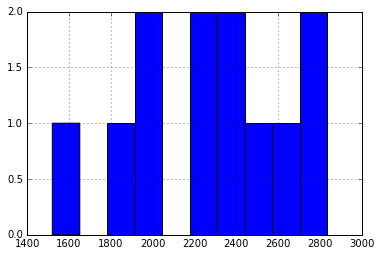

In [8]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
from datetime import datetime
inspections['better_date'] = inspections['inspection_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
inspections.head()
inspections['month'] = inspections['better_date'].apply(lambda x: x.month)
inspections.head()

inspections['month'].value_counts().hist()



In [9]:
# 5 Which zip code contains the most high risk violations?
bus_viol[bus_viol['risk_category'] == 'High Risk']['owner_zip'].value_counts()


94133         443
94110         387
94109         365
94122         352
94102         268
94103         256
94108         232
94107         196
94112         195
94114         174
94115         174
94121         164
94116         160
94117         154
94118         143
94111         128
94104         113
94123         111
94124         104
94134          97
94105          96
94080          78
94127          66
94131          51
94014          50
94132          42
94015          40
94010          37
94030          31
94066          22
             ... 
94188-2073      1
93711           1
94086           1
\t29615         1
94552           1
90015           1
98134           1
10604           1
94523           1
60646           1
91311           1
90245           1
94621           1
94930           1
94188           1
95452           1
94107-1550      1
94565           1
94610-2730      1
94561           1
91367           1
10952           1
91203           1
94602           1
994080    

In [127]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores[restaurant_scores['type'] == 'New Ownership']['risk_category'].value_counts()

Low Risk         545
Moderate Risk    419
High Risk        145
Name: risk_category, dtype: int64

In [10]:
# 7 Examining the descriptions, what is the most common violation?
bus_viol['description'].value_counts()

Unclean or degraded floors walls or ceilings                                 3395
Moderate risk food holding temperature                                       2617
Inadequate and inaccessible handwashing facilities                           2440
Unapproved or unmaintained equipment or utensils                             2326
Wiping cloths not clean or properly stored or inadequate sanitizer           2289
Unclean nonfood contact surfaces                                             2241
Inadequately cleaned or sanitized food contact surfaces                      2226
Improper food storage                                                        2137
Foods not protected from contamination                                       1822
High risk food holding temperature                                           1540
Moderate risk vermin infestation                                             1445
Improper storage of equipment utensils or linens                             1174
Inadequate food 

In [134]:
# 8 What street has the best (safest) restaurants to dine out at?
restaurant_scores['risk_category']
pattern1 = re.compile('[^0-9]+')
re.search(pattern1, restaurant_scores['address'][1]).group(0)

#for i in range(0,len(bus_viol)):
#    bus_viol['street'] = re.search(pattern1, bus_viol['address'][i]).group(0)

restaurant_scores['street'] = restaurant_scores['address'].apply(lambda x: re.search(pattern1, x).group(0).lower())
restaurant_scores
restaurant_scores.groupby('street').median()['Score'].order(ascending=False)


C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: order is deprecated, use sort_values(...)


street
various locations             100
various loacations (          100
 ocean ave                    100
 bryant st #                  100
 ferry buildling              100
 bryant st suite              100
 spear st b                   100
 ferry building shop          100
 buckingham way               100
 lusk st                      100
 south park  suite            100
 macys - geary entrance       100
 marina blvd                  100
 mariposa st                  100
 ferry building  kiosk #      100
 ferry building  #            100
 market st  a                 100
 c gene friend way            100
 ferry building               100
 ferry plaza pier             100
 bluxome st                   100
 united nations plz           100
 beverly st                   100
 united nation plaza          100
 b sloat blvd                 100
 underwood ave                100
 barneveld ave #c             100
 bartlett st                  100
 font, bldg b blvd            100
 tompki

In [ ]:
# 9 Create a hist of the scores with 10 bins
inspections.hist('Score', bins=10)

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/